<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/MAT421SectionBPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Section B HW - MAT421
## Part 2
Carson Streiff

## Quintic Spline
The following program computes the quintic spline interpolation of supplied points using experimental points supplied by the user. Testing of the program is below.

In [2]:
import numpy as np

def quintic(x,y,X):
  n = len(x)
  A = np.zeros([(n-1)*6,(n-1)*6])
  b = np.zeros([(n-1)*6])
  rowcount = 0

  #first condition
  A1 = np.zeros([(n-1), 6*(n-1)])

  offset = 0
  for i in range(0,n-1,1):
    power = 5
    for j in range(0,6,1):
      A1[i,j+offset] = x[i]**power
      power -= 1
    offset += 6
    b[rowcount] = y[i]
    rowcount += 1
    
  # print(A1)
  # print(b)

  #second condition
  A2 = np.zeros([(n-1), 6*(n-1)])

  offset = 0
  for i in range(0,n-1,1):
    power = 5
    for j in range(0,6,1):
      A2[i,j+offset] = x[i+1]**power
      power -= 1
    offset += 6
    b[rowcount] = y[i+1]
    rowcount += 1

  #third condition - first derivative

  A3 = np.zeros([(n-2), 6*(n-1)])
  for i in range(0,n-2,1):
    

      A3[i,0+6*i] = 5 * (x[i+1]**4)
      A3[i,1+6*i] = 4 * (x[i+1]**3)
      A3[i,2+6*i] = 3 * (x[i+1]**2)
      A3[i,3+6*i] = 2 * (x[i+1])
      A3[i,4+6*i] = 1
      A3[i,5+6*i] = 0

      A3[i,6+6*i] = -5 * (x[i+1]**4)
      A3[i,7+6*i] = -4 * (x[i+1]**3)
      A3[i,8+6*i] = -3 * (x[i+1]**2)
      A3[i,9+6*i] = -2 * (x[i+1])
      A3[i,10+6*i] = -1
      A3[i,11+6*i] = 0
      b[rowcount] = 0
      rowcount += 1

  #fourth condition - second derivative

  A4 = np.zeros([(n-2), 6*(n-1)])
  for i in range(0,n-2,1):
    

      A4[i,0+6*i] = 20 * (x[i+1]**3)
      A4[i,1+6*i] = 12 * (x[i+1]**2)
      A4[i,2+6*i] = 6 * (x[i+1])
      A4[i,3+6*i] = 2
      A4[i,4+6*i] = 0
      A4[i,5+6*i] = 0

      A4[i,6+6*i] = -20 * (x[i+1]**3)
      A4[i,7+6*i] = -12 * (x[i+1]**2)
      A4[i,8+6*i] = -6 * (x[i+1])
      A4[i,9+6*i] = -2
      A4[i,10+6*i] = 0
      A4[i,11+6*i] = 0
      b[rowcount] = 0
      rowcount += 1

  #fifth condition - third derivative

  A5 = np.zeros([(n-2), 6*(n-1)])
  for i in range(0,n-2,1):
    

      A5[i,0+6*i] = 60 * (x[i+1]**2)
      A5[i,1+6*i] = 24 * (x[i+1])
      A5[i,2+6*i] = 6
      A5[i,3+6*i] = 0
      A5[i,4+6*i] = 0
      A5[i,5+6*i] = 0

      A5[i,6+6*i] = -60 * (x[i+1]**2)
      A5[i,7+6*i] = -24 * (x[i+1])
      A5[i,8+6*i] = -6
      A5[i,9+6*i] = 0
      A5[i,10+6*i] = 0
      A5[i,11+6*i] = 0
      b[rowcount] = 0
      rowcount += 1

  #sixth condition - fourth derivative

  A6 = np.zeros([(n-2), 6*(n-1)])
  for i in range(0,n-2,1):
    

      A6[i,0+6*i] = 120 * (x[i+1])
      A6[i,1+6*i] = 24
      A6[i,2+6*i] = 0
      A6[i,3+6*i] = 0
      A6[i,4+6*i] = 0
      A6[i,5+6*i] = 0

      A6[i,6+6*i] = -120 * (x[i+1])
      A6[i,7+6*i] = -24
      A6[i,8+6*i] = 0
      A6[i,9+6*i] = 0
      A6[i,10+6*i] = 0
      A6[i,11+6*i] = 0
      b[rowcount] = 0
      rowcount += 1

  #first derivative endpoint constraint
  A7 = np.zeros([2,6*(n-1)])
  A7[0,0] = 5 * (x[0]**4)
  A7[0,1] = 4 * (x[0]**3)
  A7[0,2] = 3 * (x[0]**2)
  A7[0,3] = 2 * (x[0])
  A7[0,4] = 1
  b[rowcount] = 0
  rowcount += 1

  A7[1,6*(n-2)] = 5 * (x[n-1]**4)
  A7[1,6*(n-2) + 1] = 4 * (x[n-1]**3)
  A7[1,6*(n-2) + 2] = 3 * (x[n-1]**2)
  A7[1,6*(n-2) + 3] = 2 * (x[n-1])
  A7[1,6*(n-2) + 4] = 1
  b[rowcount] = 0
  rowcount += 1

  #second derivative endpoint constraint
  A8 = np.zeros([2,6*(n-1)])
  A8[0,0] = 20 * (x[0]**3)
  A8[0,1] = 12 * (x[0]**2)
  A8[0,2] = 6 * (x[0])
  A8[0,3] = 2
  A8[0,4] = 0
  b[rowcount] = 0
  rowcount += 1

  A8[1,6*(n-2)] = 20 * (x[n-1]**3)
  A8[1,6*(n-2) + 1] = 12 * (x[n-1]**2)
  A8[1,6*(n-2) + 2] = 6 * (x[n-1])
  A8[1,6*(n-2) + 3] = 2
  A8[1,6*(n-2) + 4] = 0
  b[rowcount] = 0
  rowcount += 1


  # print("A1:")
  # print(A1)
  # print("A2:")
  # print(A2)
  # print("A3:")
  # print(A3)
  # print("A4:")
  # print(A4)
  # print("A5:")
  # print(A5)
  # print("A6:")
  # print(A6)
  # print("A7:")
  # print(A7)
  # print("A8:")
  # print(A8)
  # print("b:")
  # print(b)

  #initialize final matrix representing the system of equations

  dim = (len(b),len(b))
  A = np.zeros(dim)

  #concatenating all the result matrices together
  row = 0
  for i in range(0,len(A1),1):
    A[i,:] = A1[i,:]
    row += 1
  offset = row
  for i in range(0,len(A2),1):
    A[i+offset,:] = A2[i,:]
    row += 1
  offset = row
  for i in range(0,len(A3),1):
    A[i+offset,:] = A3[i,:]
    row += 1
  offset = row
  for i in range(0,len(A4),1):
    A[i+offset,:] = A4[i,:]
    row += 1
  offset = row
  for i in range(0,len(A5),1):
    A[i+offset,:] = A5[i,:]
    row += 1
  offset = row
  for i in range(0,len(A6),1):
    A[i+offset,:] = A6[i,:]
    row += 1
  offset = row
  for i in range(0,len(A7),1):
    A[i+offset,:] = A7[i,:]
    row += 1
  offset = row
  for i in range(0,len(A8),1):
    A[i+offset,:] = A8[i,:]
    row += 1
  # print("A:")
  # print(A)

    #solving the system of equatons using the numPy built in functions to get coefficients of our cubic equations

  coef = np.dot(np.linalg.inv(A), b)
  # print("Coefficients: ")
  # print(coef)



  #evaluating at the given points
  Y = [0] * len(X)
  for i in range(0,len(X),1):
    j = 0
    while x[j] < X[i]:
      j += 1
    index = j-1
    
    term1 = coef[6*index]
    term2 = coef[6*index + 1]
    term3 = coef[6*index + 2]
    term4 = coef[6*index + 3]
    term5 = coef[6*index + 4]
    term6 = coef[6*index + 5]

    
    Y[i] = term1 * (X[i] ** 5) + term2 * (X[i]**4) + term3 * (X[i]**3) + term4 * (X[i]**2) + term5 * (X[i]) + term6

  # print("Interpolation:")
  return Y

quintic([1,2,3],[1,3,2],[0.2,0.5,1.5,2.4,2.9])


[139.5292800000059,
 59.373046875002586,
 1.6972656249996803,
 2.687959999999066,
 2.007631874998424]

## Testing the quintic spline
This program takes experimental x and y values, then interpolates given x values using the quintic spline program from above. It also marks the experimental points in red.

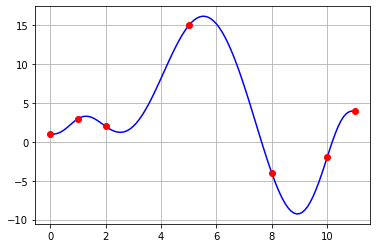

In [5]:
import matplotlib.pyplot as plt

# x = [1,2,3,4,5,6,7,8,9,10]
# y = [20,100,3,50,30,4,12,66,89,100]
# x_new = np.arange(1.1,10,0.1)

x = [0,1,2,5,8,10,11]
y = [1,3,2,15,-4,-2,4]
x_new = np.arange(0.1,11,0.1)


y_new = quintic(x,y,x_new)

plt.plot(x_new,y_new,'b')
plt.plot(x,y,'ro')
plt.grid()

## Problem 3: Lagrange Interpolation
This program takes a set of x-values, along with some experimental coordinates, and finds the corresponding y-values calculated using Lagrange interpolation. The code works for any amount of points.

In [ ]:
def my_lagrange(x,y,X):
  values = [0] * len(X)
  #for each value in the X list
  for i in range(0,len(X),1):

    #this sum represents the final lagrange polynomial
    sum = 0



    #which basis polynomial we're on
    for j in range(0,len(x),1):
      

      product = 1
      #evaluate terms in that basis polynomial
      for g in range(0,len(x),1):
        
        if g != j:
          product *= ((X[i] - x[g]) / (x[j] - x[g]))

      #add that term x the y values to the sum
      sum += product*y[j]
    values[i] = sum
  return values
      

      
my_lagrange([0,1,2],[1,3,2],[0.5,1.75,2.5,3])

[2.375, 2.53125, 0.375, -2.0]

## Testing the Lagrange interpolation
This code tests the Lagrange interpolation function written in problem 3. The experimental points can be edited, as well as the range of the plot. Experimental points are marked in red.

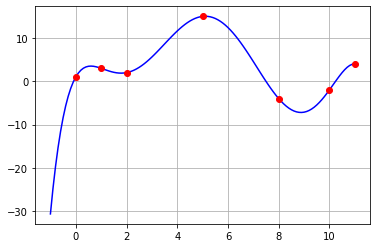

In [ ]:
import matplotlib.pyplot as plt
x_points = [0,1,2,5,8,10,11]
y_points = [1,3,2,15,-4,-2,4]
x_new = np.arange(-1.0,11,0.1)

y_new = my_lagrange(x_points,y_points,x_new)

plt.plot(x_new,y_new,'b',x_points,y_points,'ro')
plt.grid()

## Problem 4: Newton's Polynomial Interpolation
Implementation of Newton interpolation. Values can be adjusted to compare to the Lagrange method.

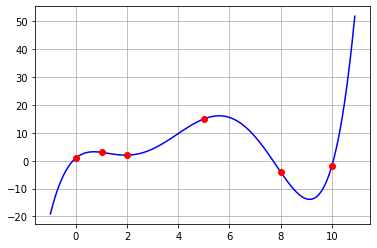

In [ ]:
def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n,n])


  #first column is y values
  coef[:,0] = y
  

  for i in range(1,n):
    for j in range(n-i):
      
      coef[j,i] = (coef[j+1,i-1] - coef[j,i-1]) / (x[j+i] - x[j])
      
  return coef

#pass one number at a time
def newton_interp(coef,x_values,x):

  y = [0] * len(x)
  for j in range(0,len(x)):
    n = len(x_values) - 1
    
    sum = coef[0,n]
    #iterate backwards through the coefficients, building the value of f(x)
    for i in range(1,n+1):
      sum = coef[0,n-i] + (x - x_values[n-i])*sum
    y[j] = sum
  return y

x = [0,1,2,5,8,10]
y = [1,3,2,15,-4,-2]
coef = divided_diff(x,y)

x_new = np.arange(-1,11,0.1)
y_new = newton_interp(coef,x,x_new)
plt.plot(x_new,y_new[0],'b',x,y,'ro')
plt.grid()